## Data Exploration - Crime Data Analysis

#### Objective: Analyze the data and draw conclusions on the distribution and nature of crime in Montreal City. In your analysis, include maps that visualize the location of different incidents globally and in relation to police districts.

Read: problemStatement.txt for more info

In [1]:
import json
import pandas as pd

In [18]:
df = pd.read_csv('/Users/admin/Documents/VS Code Learning/DataExplorationProjects/DataOutlierDetectionsCSV/raw_data.csv')

In [19]:
df.sample(n=10, random_state=20)

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
7458,7459,F,08/12/1933,2020,202006,VIPcare,NON-SNP,NaN,63,HMO,...,$0.00,"$20,200.00",$0.00,$8.06,$0.00,$12.06,$0.00,$13.21,$13.14,$786.16
8047,8048,F,06/05/1961,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,69,HMO,...,$0.00,"$15,326.47",$0.00,$9.39,$0.00,"$69,247.49",$0.00,"$68,915.21","$71,028.34",$909.74
8052,8053,M,25/12/1949,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,69,HMO,...,$0.00,"$16,007.97",$0.00,$8.21,$0.00,$0.00,$0.00,$0.00,$0.00,$897.84
2522,2523,F,10/02/1953,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,20,HMO,...,$0.00,"$4,177.98",$730.58,$9.20,$0.00,$289.80,$0.00,$291.99,$293.65,$866.42
4113,4114,M,09/11/1948,2020,202006,Affiliate,NON-SNP,NaN,31,HMO,...,$0.00,"$10,032.17",$0.00,$8.51,$0.00,"$15,681.50",$0.00,"$13,977.64","$14,058.75",$980.47
7347,7348,F,09/04/1952,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,62,HMO,...,$0.00,"$3,067.57",$0.00,$9.63,$0.00,$0.00,$0.00,$0.00,$0.00,$629.54
569,570,M,21/12/1946,2020,202006,Affiliate,NON-SNP,NaN,5,HMO,...,$0.00,"$8,089.97",$0.00,$9.38,$0.00,$454.15,$0.00,$436.94,$453.67,$770.56
6491,6492,M,20/04/1941,2020,202006,VIPcare,NON-SNP,NaN,57,HMO,...,$0.00,"$7,075.97",$0.00,$9.41,$0.00,$95.87,$0.00,$95.12,$95.02,$675.93
8630,8631,F,26/09/1946,2020,202006,VIPcare,NON-SNP,MEDICARE - CAREFREE,75,HMO,...,$0.00,"$2,584.05",$0.00,$9.24,$0.00,$458.20,$0.00,$474.33,$485.74,$659.55
9942,9943,F,09/04/1949,2020,202006,VIPcare,D-SNP,MEDICARE - CARENEEDS,87,HMO,...,$0.00,"$7,819.41",$0.00,$9.33,$0.00,$233.86,$0.00,$210.18,$239.30,$692.63


In [20]:
df.shape

(10530, 28)

In [21]:
df.describe()

,member_unique_id,eligible_year,eligible_month,npi
count,10530.000000,10530.0,10530.0,10530.000000
mean,5265.500000,2020.0,202006.0,44.351852
std,3039.893501,0.0,0.0,27.025010
min,1.000000,2020.0,202006.0,1.000000
25%,2633.250000,2020.0,202006.0,21.000000
50%,5265.500000,2020.0,202006.0,40.000000
75%,7897.750000,2020.0,202006.0,68.000000
max,10530.000000,2020.0,202006.0,93.000000


In [22]:
df.head()

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
0,1,F,21/06/1990,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,$0.00,"$3,507.00",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$843.78
1,2,M,02/01/1948,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,$0.00,"$6,204.84",$0.00,$8.13,$0.00,"$11,289.69",$0.00,"$10,688.46","$10,859.82",$906.77
2,3,M,14/06/1948,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,$0.00,"$4,012.46",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$815.84
3,4,M,10/02/1954,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,...,$0.00,"$9,770.61",$0.00,$8.30,$0.00,$73.88,$0.00,$62.87,$64.91,$846.26
4,5,M,31/12/1953,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,$0.00,"$19,976.13","$8,875.80",$8.90,$0.00,$522.48,$0.00,$517.56,$606.01,$867.55


In [23]:
df.columns

Index(['member_unique_id', 'gender', 'dob', 'eligible_year', 'eligible_month',
       'affiliation_type', 'pbp_group', 'plan_name', 'npi', 'line_of_business',
       'esrd', 'hospice', 'ipa_funding', 'ma_premium', 'ma_risk_score',
       'mbr_with_rx_rebates', 'partd_premium', 'pcp_cap', 'pcp_ffs',
       'plan_premium', 'prof', 'reinsurance', 'risk_score_partd', 'rx',
       'rx_rebates', 'rx_with_rebates', 'rx_without_rebates', 'spec_cap'],
      dtype='object')

In [24]:
df.dtypes

member_unique_id        int64
gender                 object
dob                    object
eligible_year           int64
eligible_month          int64
affiliation_type       object
pbp_group              object
plan_name              object
npi                     int64
line_of_business       object
esrd                     bool
hospice                  bool
ipa_funding            object
ma_premium             object
ma_risk_score          object
mbr_with_rx_rebates    object
partd_premium          object
pcp_cap                object
pcp_ffs                object
plan_premium           object
prof                   object
reinsurance            object
risk_score_partd       object
rx                     object
rx_rebates             object
rx_with_rebates        object
rx_without_rebates     object
spec_cap               object
dtype: object

In [25]:
financial_columns = [
    "ipa_funding",
    "ma_premium",
    "ma_risk_score",
    "mbr_with_rx_rebates",
    "partd_premium",
    "pcp_cap",
    "pcp_ffs",
    "plan_premium",
    "prof",
    "reinsurance",
    "risk_score_partd",
    "rx",
    "rx_rebates",
    "rx_with_rebates",
    "rx_without_rebates",
    "spec_cap"
]

In [26]:
# remove the dollar sign from the financial columns
df[financial_columns] = df[financial_columns].replace('[\$,]', '', regex=True).astype(float)

In [27]:
df

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
0,1,F,21/06/1990,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,0.0,3507.00,0.00,7.92,0.0,0.00,0.0,0.00,0.00,843.78
1,2,M,02/01/1948,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,0.0,6204.84,0.00,8.13,0.0,11289.69,0.0,10688.46,10859.82,906.77
2,3,M,14/06/1948,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,0.0,4012.46,0.00,7.92,0.0,0.00,0.0,0.00,0.00,815.84
3,4,M,10/02/1954,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,...,0.0,9770.61,0.00,8.30,0.0,73.88,0.0,62.87,64.91,846.26
4,5,M,31/12/1953,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,0.0,19976.13,8875.80,8.90,0.0,522.48,0.0,517.56,606.01,867.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10525,10526,F,07/04/1954,2020,202006,SaludVIP,NON-SNP,NaN,93,HMO,...,0.0,5097.30,0.00,8.94,0.0,317.71,0.0,292.58,279.22,989.74
10526,10527,F,08/12/1945,2020,202006,SaludVIP,NON-SNP,NaN,93,HMO,...,0.0,11278.18,0.00,8.93,0.0,238.86,0.0,234.95,248.51,1002.72
10527,10528,M,08/06/1950,2020,202006,SaludVIP,NON-SNP,MEDICARE - CAREFREE,93,HMO,...,0.0,21917.27,0.00,9.04,0.0,0.00,0.0,0.00,0.00,840.19
10528,10529,M,12/10/1949,2020,202006,SaludVIP,NON-SNP,MEDICARE - CAREFREE,93,HMO,...,0.0,11212.60,364.93,8.96,0.0,529.86,0.0,638.28,641.81,868.84


In [28]:
df[financial_columns].describe().T

# Here are some bullet points about the data that might indicate some outliers:

# the difference between the 75th and the max value of mbr_with_rx_rebates is very big compared to other quantiles
# the 75th percentile of pcp_ffs is still zero, while its max is 6056.44
# the 75th percentile of prof is still zero, while its max is 69516.96
# all values of risk_score_partd and rx_rebates are zeros - these can be removed from the data
# rx_with_rebates and rx_without_rebates have almost identical values

,count,mean,std,min,25%,50%,75%,max
ipa_funding,10530.0,10657.849594,7690.191694,1302.36,5390.6450,8723.135,13444.6325,113850.93
ma_premium,10530.0,12311.727551,8955.579076,1394.85,6200.2550,10060.455,15479.8400,155112.65
ma_risk_score,10530.0,14.601082,11.398322,0.00,6.5025,11.740,18.9200,174.60
mbr_with_rx_rebates,10530.0,500.425354,1130.533796,13.94,197.2100,312.365,499.3525,32687.50
partd_premium,10530.0,281.523642,239.155174,8.62,130.7800,220.590,352.0325,3120.53
pcp_cap,10530.0,507.875923,269.436836,0.00,503.0200,613.500,684.2600,833.33
pcp_ffs,10530.0,44.715122,279.992983,0.00,0.0000,0.000,0.0000,6056.44
plan_premium,10530.0,12622.875903,9165.144567,1295.18,6362.8100,10317.105,15886.7650,138352.50
prof,10530.0,407.262296,1787.161653,0.00,0.0000,0.000,0.0000,69516.96
reinsurance,10530.0,8.728322,0.505910,7.91,8.2900,8.690,9.1600,9.67


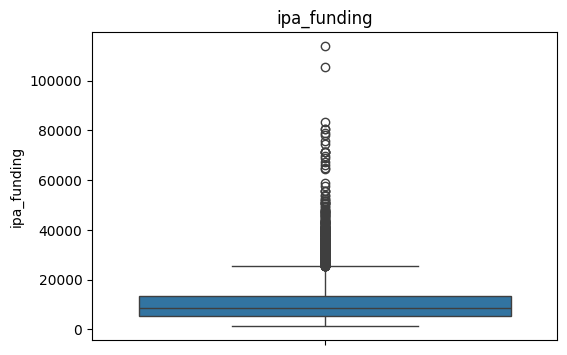

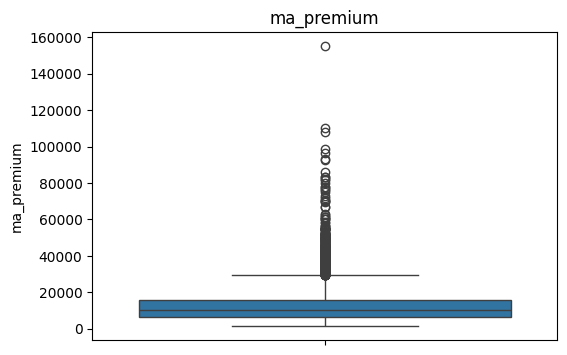

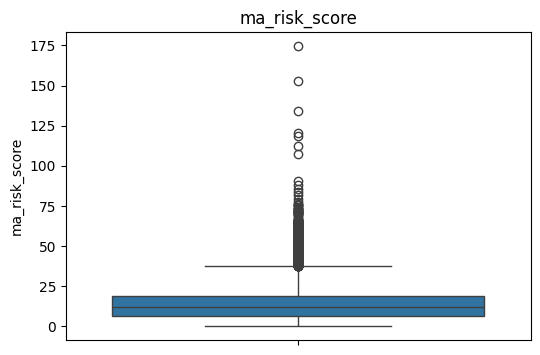

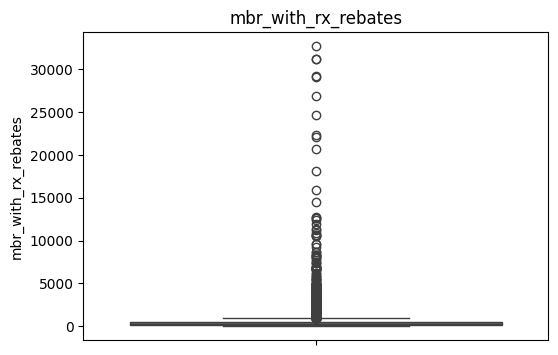

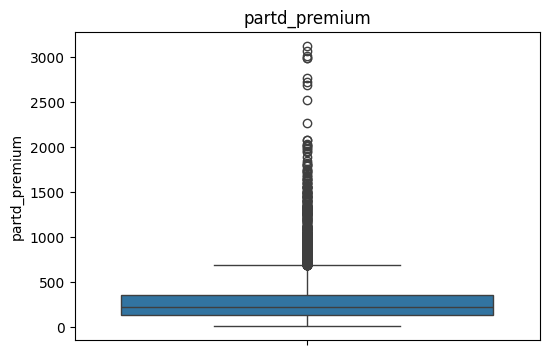

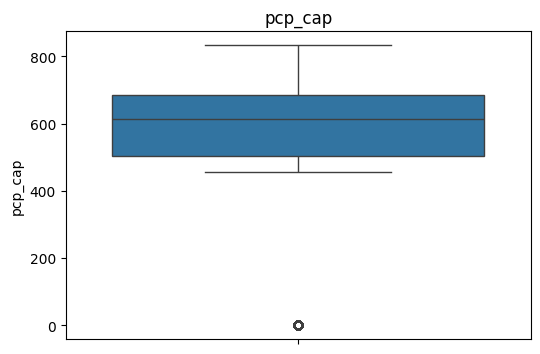

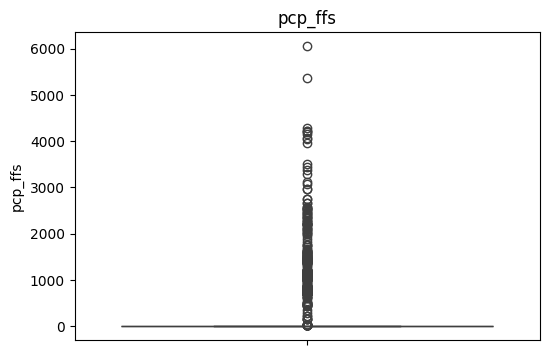

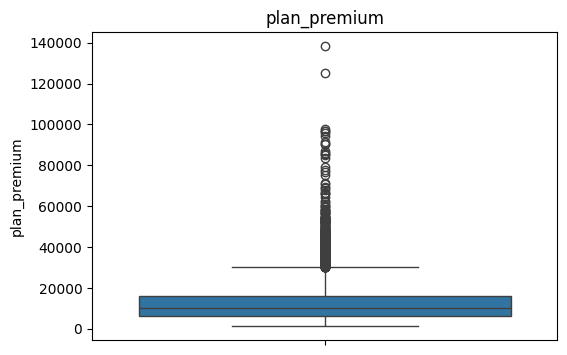

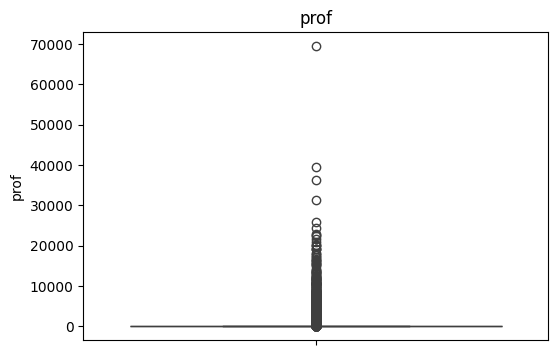

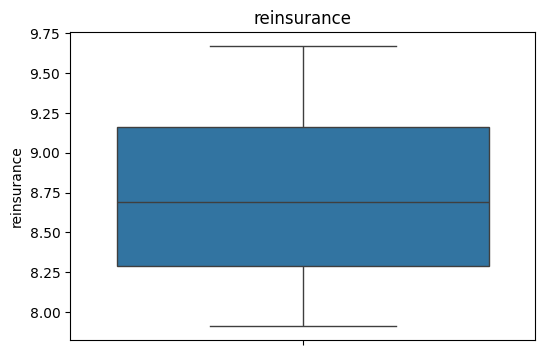

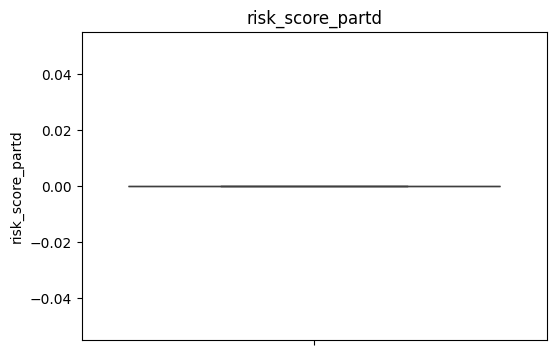

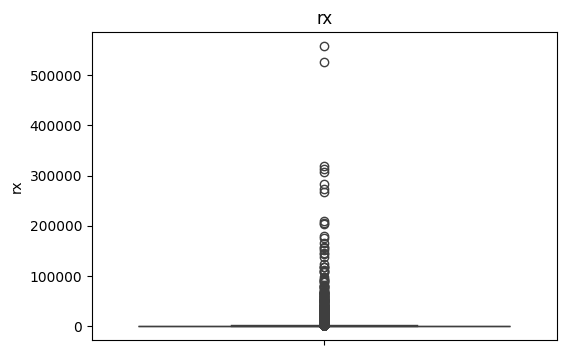

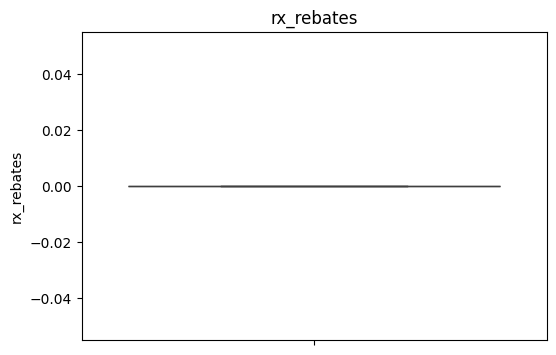

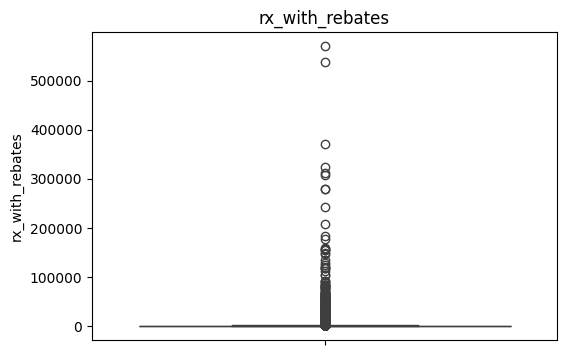

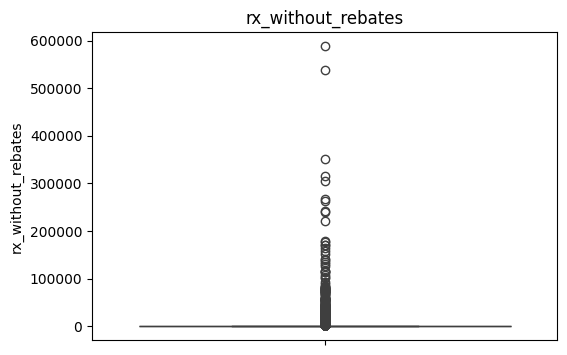

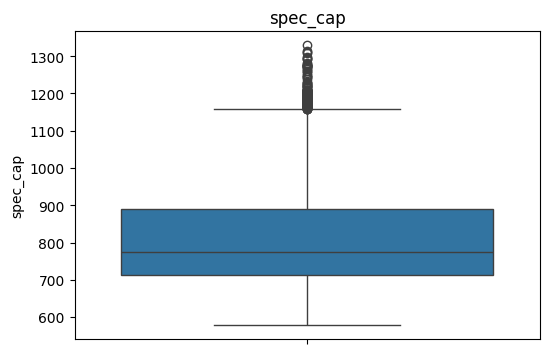

In [29]:
for i, financial_column in enumerate(financial_columns):
    plt.figure(figsize=(6, 4))
    plt.title(financial_column)
    sns.boxplot(data=df[financial_column])

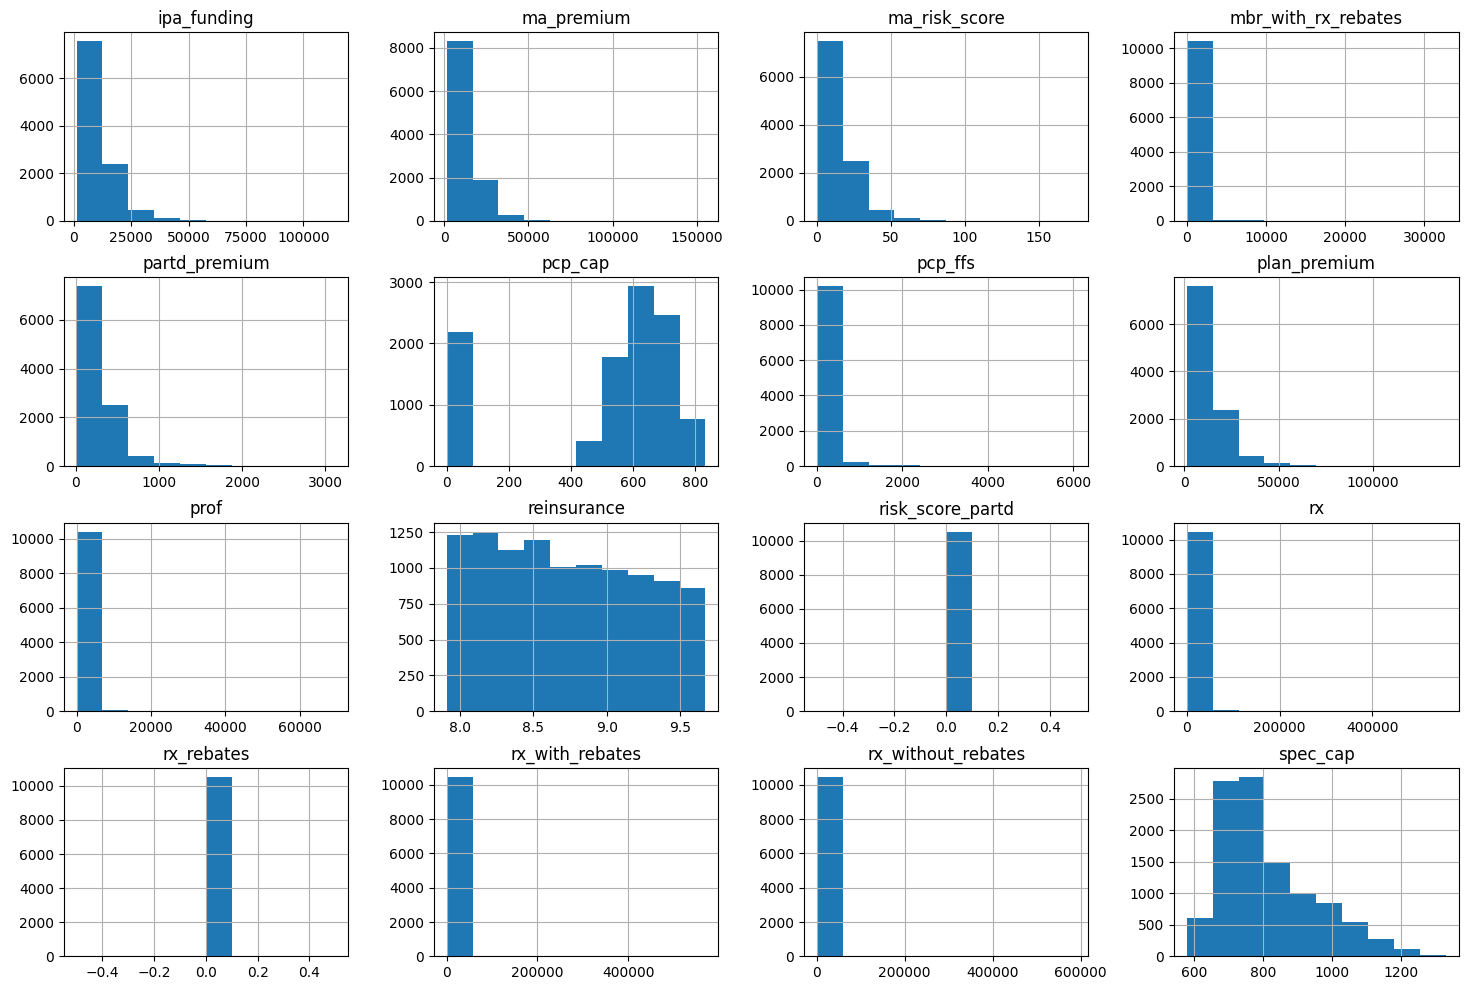

In [30]:
_ = df[financial_columns].hist(figsize=(18, 12))